In [1]:
import pickle as pkl
import glob
import pandas as pd

# usage data

all_data = []

for fname in glob.glob('../Data/usage_data20*.pkl'):
    with open(fname, 'rb') as handle:
        varname = fname.split('.')[0]
        unpkl = pkl.load(handle)
        all_data.append(unpkl)
        print('DataFrame loaded: ' + varname)
        
# locations

all_data = pd.concat(all_data)

with open('../Data/all_locs.pkl', 'rb') as handle:
    all_locs = pkl.load(handle)


DataFrame loaded: 
DataFrame loaded: 
DataFrame loaded: 
DataFrame loaded: 
DataFrame loaded: 


In [2]:
import datetime

format = "%d/%m/%Y %H:%M"

In [3]:
# Date and time filters to manage data

all_data['Start Date']= all_data['Start Date'].str[:16]

all_data['Start Date Converted']= pd.to_datetime(all_data['Start Date'], format=format).dt.date

all_data['Hours']= pd.to_datetime(all_data['Start Date'], format=format).dt.hour

all_data['Day']= pd.to_datetime(all_data['Start Date'], format=format).dt.weekday


def time_filter(dataset, lower_time, upper_time):
    dataset = dataset[(dataset['Hours'] >= lower_time) & (dataset['Hours'] < upper_time)]
    return dataset

def date_filter(dataset, lower_year, lower_month, lower_day, upper_year, upper_month, upper_day):
    dataset = dataset[(dataset["Start Date Converted"] >= datetime.datetime(lower_year,lower_month,lower_day).date()) 
                      & (dataset["Start Date Converted"] < datetime.datetime(upper_year,upper_month,upper_day).date())]
    return dataset

## This cuts out weekends 
def weekend_filter(dataset):
    dataset = dataset[(dataset["Day"] < 5)]
    return dataset

## This drops one specific day
def drop_specific_date(dataset, year, month, day):
    dataset = dataset[(dataset["Start Date Converted"] != datetime.datetime(year,month,day).date())]
    return dataset


all_data.head()


,Start Date,StartStation Id,End Date,EndStation Id,Duration,Start Date Converted,Hours,Day
0,29/08/2012 22:53,311.0,29/08/2012 22:57,239.0,222.0,2012-08-29,22,2
1,29/08/2012 06:35,45.0,29/08/2012 06:52,341.0,1012.0,2012-08-29,6,2
2,28/08/2012 07:02,96.0,28/08/2012 07:06,73.0,284.0,2012-08-28,7,1
3,29/08/2012 06:50,96.0,29/08/2012 06:55,73.0,307.0,2012-08-29,6,2
4,28/08/2012 07:36,320.0,28/08/2012 07:41,376.0,330.0,2012-08-28,7,1


In [9]:
# Dates of tube strikes to filter data 2015
#Peak morning times for comparison
tube_strike = time_filter(all_data, 6, 10)
tube_strike_one = date_filter(tube_strike,2015,7,9,2015,7,10)
#tube_strike_two = date_filter(tube_strike,2015,8,27,2015,8,28)
#tube_strike_three = date_filter(tube_strike,2015,8,29,2015,8,30)
#Date tube strikes 2016 examples
#tube_strike_four = date_filter(tube_strike,2016,1,27,2016,1,28)
#tube_stike_five = date_filter(tube_strike,2016,3,24,2016,3,25)
#tube_strike_four.head()

In [10]:
## First control group - a week before the strike on the same day

tube_strike_control_1 = time_filter(all_data, 6, 10)
tube_strike_control_1 = date_filter(tube_strike_control_1, 2015,7,2,2015,7,3)

## Second control group - a week after the strike on the same day

tube_strike_control_2 = time_filter(all_data, 6, 10)
tube_strike_control_2 = date_filter(tube_strike_control_2, 2015,7,16,2015,7,17)

## Larger control group - month either side of the strike, dropping weekends and strike itself - 43 days total

control = time_filter(all_data, 6, 10)
control = date_filter(control, 2015,6,9,2015,8,9)
control = weekend_filter(control)
control = drop_specific_date(control, 2015,7,9)


In [14]:
import bokeh
import bokeh.charts
from bokeh.charts import Bar

period_collapse = period.loc[:, ('Start Date Converted', 'c')].groupby(['Start Date Converted']).sum()
period_collapse.reset_index(inplace=True)
period_collapse.rename(columns={'c': 'Count', 'Start Date Converted': 'Date'}, inplace=True)

period_collapse.head()

tools = [PanTool(), WheelZoomTool(), ResetTool()]

bar = Bar(period_collapse, values='Count', label='Date', color='red', ylabel='Count',
          legend = None, title="Number of journeys per day", plot_width=950, tools=tools)

output_notebook()
show(bar)

output_file("bokeh_plots/journeys_per_day.html")
save(bar)

ModuleNotFoundError: No module named 'bokeh.charts'

In [4]:
import csv
with open('rainfall_2016_hampstead_mm.csv', 'rb') as raindata:
    the_lines = raindata.readlines()
    for line in the_lines:
        print(str(line).split(','))    

["b'Day", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', "Dec\\r\\n'"]
["b'1", '0.4', '0', '5.7', '0', '0', '0.5', '0.5', '4.6', '0', '10.2', '0', "0\\r\\n'"]
["b'2", '6.5', '0', '1.7', '2.7', '0.2', '0', '0.2', '7.7', '0', '0', '0', "0.4\\r\\n'"]
["b'3", '5.6', '0', '1.6', '1.8', '0', '0', '0', '0.2', '5.5', '0', '0.2', "0\\r\\n'"]
["b'4", '0', '0.2', '2.6', '0.4', '0', '0', '0', '0', '0', '0', '7.2', "0\\r\\n'"]
["b'5", '0.5', '0.9', '0.3', '0', '0', '0', '0', '0', '3.7', '0', '0', "0\\r\\n'"]
["b'6", '0.3', '4.8', '0.6', '0.7', '0', '0', '0', '0', '0', '0', '2.2', "0\\r\\n'"]
["b'7", '11.8', '13', '0', '1.5', '0', '2', '0', '0', '0', '0', '0', "0\\r\\n'"]
["b'8", '0.2', '1.1', '0.3', '0', '0', '7', '0', '0', '0', '0', '1.1', "0\\r\\n'"]
["b'9", '4.8', '0.2', '13.9', '2.2', '2', '0', '0', '0', '0', '1.8', '20.8', "0\\r\\n'"]
["b'10", '1.3', '0', '0', '0', '5.2', '0.2', '0.1', '0', '4.2', '0.2', '0', "6.6\\r\\n'"]
["b'11", '16.1', '0', '0', '3', '17.7', '

In [5]:
import pandas as pd
weather_data= pd.read_csv('rainfall_2016_hampstead_mm.csv')

In [6]:
weather_data

,Day,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0.4,0.0,5.7,0.0,0.0,0.5,0.5,4.6,0.0,10.2,0.0,0.0
1,2,6.5,0.0,1.7,2.7,0.2,0.0,0.2,7.7,0.0,0.0,0.0,0.4
2,3,5.6,0.0,1.6,1.8,0.0,0.0,0.0,0.2,5.5,0.0,0.2,0.0
3,4,0.0,0.2,2.6,0.4,0.0,0.0,0.0,0.0,0.0,0.0,7.2,0.0
4,5,0.5,0.9,0.3,0.0,0.0,0.0,0.0,0.0,3.7,0.0,0.0,0.0
5,6,0.3,4.8,0.6,0.7,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0
6,7,11.8,13.0,0.0,1.5,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,0.2,1.1,0.3,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.1,0.0
8,9,4.8,0.2,13.9,2.2,2.0,0.0,0.0,0.0,0.0,1.8,20.8,0.0
9,10,1.3,0.0,0.0,0.0,5.2,0.2,0.1,0.0,4.2,0.2,0.0,6.6


In [59]:
lengths=[]
#lengths_wk=[]
#wk=[2,3,9,10,16,17,24,25]
dec=date_filter(all_data, 2016,12,1,2016,12,30)
dec_wk= weekend_filter(dec)
for i in range(1,30):
    period = date_filter(dec_wk, 2016,12,i,2016,12,i+1)
    lengths.append(len(period))   
lengths

[25828,
 25345,
 0,
 0,
 25705,
 27618,
 28777,
 27782,
 28699,
 0,
 0,
 24850,
 26119,
 28263,
 27612,
 26809,
 0,
 0,
 22946,
 24182,
 22419,
 20644,
 13840,
 0,
 0,
 9462,
 9222,
 11183,
 12632]

In [60]:
import numpy as np
#type(np.array(weather_data))
extract=np.array(weather_data)[:,12]
extract=extract[:-2]
extract.shape

(29,)

In [61]:
def zero_to_nan(lengths):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in lengths]

length=(zero_to_nan(lengths))

In [62]:

numtrip=np.array(length)
#numtrip_wk=np.array(lengths_wk)
numtrip.shape

(29,)

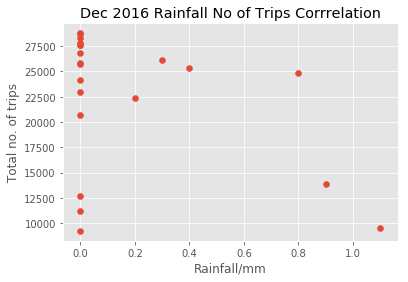

In [64]:
correlation=np.corrcoef(extract,numtrip)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.title('Dec 2016 Rainfall No of Trips Corrrelation')
plt.xlabel('Rainfall/mm')
plt.ylabel('Total no. of trips')
plt.scatter(extract, numtrip)
plt.savefig('./raincorr_dec16.png')

In [150]:
print(all_data.dtypes)

Start Date               object
StartStation Id         float64
End Date                 object
EndStation Id           float64
Duration                float64
Start Date Converted     object
Hours                     int64
Day                       int64
dtype: object
